# Segundo Examen Módulo I Edgar Cardoso

# Solicitud de Créditos

## Librerías

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Funciones

In [105]:
##### Renombrar Variables
def renombrar_variables(lista_variables, tipo_variables):
    """ renombrar_variables(lista_variables, tipo_variables) -> {variable_original : variable con prefijo}
    Recibe una lista con el nombre de las variables de un sólo tipo
    y regresa un diccionario que tiene como llave el nombre de la 
    variable original y como valor el nombre de la variable con el 
    prefijo del tipo de variable indicada
    
    tipo_variables: 'continua', 'discreta', 'fecha', 'texto'
    """
    try:
        if type(lista_variables) != list:
            print('Se debe introducir una lista no vacia con el nombre de las variables')
        else:
            if tipo_variables not in ['continua', 'discreta', 'fecha', 'texto']:
                print('tipo_variable debe se alguna de las siguientes opciones \n "continua", "discreta", "fecha", "texto"')
            else:
                # Se elige el tipo de variable
                if tipo_variables == 'continua':
                    pref = 'c'
                elif tipo_variables == 'discreta':
                    pref = 'v'
                elif tipo_variables == 'fecha':
                    pref = 'd'
                elif tipo_variables == 'texto':
                    pref = 't'
    
                # Se junta el prefijo de la variable con espacio, luego los espacios se cambian por _
                nuevas = map(lambda x: (' '.join((pref , x))).replace(' ', '_'), lista_variables)
                
                #Diccionario final
                return dict(zip(lista_variables, nuevas))
            
    except:
        print('Se debe introducir una lista con valores no repetidos')

###### Limpieza de Texto

def limp_texto(Serie):
    # Lista de texto limpia
    clean_t = []

    # entrar en cada texto y eliminar mayusculas o caracteres especiales
    for text in Serie:
        aux1 = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
        aux2 = re.sub("[^a-zA-Z0-9 ]", " ", aux1.decode("utf-8"), flags=re.UNICODE)
        aux3 = u' '.join(aux2.lower().split())
        clean_t.append(aux3)
    
    return clean_t

# Grafica de Pie
def Pie(labels, values, title, path):
    fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent')])
    fig.update_layout(title_text=title)
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
    if path != False:
        fig.write_image(path, scale = 1.5)
    fig.show()
    
# grafica de barras
def Bar(etiquetas, valores, titulo, path, color = 'blue'):
    fig = go.Figure(data=[go.Bar(x=etiquetas, y=valores, text=valores, marker_color=color)])
    fig.update_layout(title_text=titulo)
    fig.update_traces(textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
    if path != False:
        fig.write_image(path, scale = 1.5)
    fig.show()
    
# grafica de lineas
def Line(etiquetas, valores, titulo, path, color = 'blue'):
    fig = go.Figure(data=[go.Scatter(x=etiquetas, y=valores, text=valores, marker_color=color)])
    fig.update_layout(title_text=titulo)
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
    if path != False:
        fig.write_image(path, scale = 1.5)
    fig.show()
    
# boxplot
def Box(data, titulo, path, color = 'blue'):
    fig = go.Figure(data=[go.Box(y=data, marker_color=color)])
    fig.update_layout(title_text=titulo)
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
    if path != False:
        fig.write_image(path, scale = 1.5)
    fig.show()

    
### Creacion de nube de palabras
def word_cloud(texto, path_texto, path_imagen):
    # CReacion de .txt
    with open(path_texto,"w") as f:
        for text in texto:
            f.write(str(text + ' '))
    f.close()

    # paths
    path_texto=path_texto
    path_imagen=path_imagen

    stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen)
    # mostrar imagen
    return Image.open(path_imagen)

## HIstogramas
def Histograma(data, bins, log, xlabel, titulo, path, color = 'blue'):
    #tamaño
    plt.figure(figsize=(10, 7))
    #histograma
    plt.hist(data, bins = bins, log = log, color = color)
    #xlabel
    plt.xlabel(xlabel)
    #titulo
    plt.title(titulo)
    #salvar imagen
    if path != False:
        plt.savefig(path, dpi = 200)
    
    return plt.show()

def Box(data, xlabel, titulo, path):
    plt.figure(figsize = (10, 7))
    #grafica de caja
    plt.boxplot(data)
    #xlabel
    plt.xlabel(xlabel)
    #titulo
    plt.title(titulo)
    #salvar imagen
    if path != False:
        plt.savefig(path, dpi = 200)
    
    return plt.show()

# fuera de la naturaleza de los datos
def out_nature(df, column, tipo):
    # guardar indices
    aux = []
    # tipo de variable
    if tipo == 'alpha':
        # solo valores no nulos
        for i in df.loc[:, column].dropna().index:
            # prueba alfabética
            if not df.loc[i, column].isalpha():
                aux.append(i)
                
    elif tipo == 'digit':
        # solo valores no nulos
        for i in df.loc[:, column].dropna().index:
            # prueba numérica
            try:
                float(df.loc[i, column])
            except:
                aux.append(i)
    # lista de índices diferentes        
    return aux

def IQR(df):
    """ IQR(data_frame sin target) -> lista de indices a eliminar, data frame con cantidades a eliminar
    La función recibe el data frame sin target y regresa una lista de indices a eliminar
    por el método de IQR y un data frame con estadísticas de valores eliminados.
    """
    # Obtenemos los cuantíles para las variables
    Q1 = df.quantile(.25) # se elimina el target
    Q3 = df.quantile(.75) # se elimina el target

    #IQR
    IQR = Q3 - Q1
    
    # Valores superiores e inferiores
    INF=Q1-1.5*(IQR)
    SUP=Q3+1.5*(IQR)
    
    # número de outliers por variable
    out_IQR = ((df<INF)|(df>SUP)).sum()[SUP.index]

    #outliers con respecto al total
    out_IQR_100 = (out_IQR/df.shape[0])*100

    # guardar lista de indices
    index_general = []
    # recorrer cada variables para obtener indices
    for variable in SUP.index:
        iqr_aux = (df[variable]<INF[variable])|(df[variable]>SUP[variable])
        index_general.append(list(iqr_aux[iqr_aux].index))
    
    # diccionario de variables y sus indices con outliers
    dict_IQR = dict(zip(SUP.index, index_general))
    
    # Outliers IQR
    IQR_df = pd.concat([out_IQR, out_IQR_100], axis = 1, join='inner')
    IQR_df.columns = ['n outliers IQR', 'n outliers IQR %']
    
    return (dict_IQR, IQR_df)

def percentiles(df):
    """percetiles(data_frame sin target) -> lista de indices a eliminar, data frame con cantidades a eliminar
    La función recibe el data frame sin target y regresa una lista de indices a eliminar
    por el método de Percentiles y un data frame con estadísticas de valores eliminados.
    """
    Q5 = df.quantile(.5) # eliminamos la varible objectivo
    Q95 = df.quantile(.95) # eliminamos la varible objectivo
    
    # número de outliers por variable
    out_Per = ((df<Q5)|(df>Q95)).sum()
    
    #outliers con respecto al total
    out_Per_100 = (out_Per / df.shape[0]) * 100
    
    # guardar lista de indices
    index_general = []
    # recorrer cada variables para obtener indices
    for variable in Q95.index:
        per_aux = (df[variable]<Q5[variable])|(df[variable]>Q95[variable])
        index_general.append(list(per_aux[per_aux].index))
    
    # diccionario de variables y sus indices con outliers
    dict_Per = dict(zip(Q95.index, index_general))
    
    # Outliers Percentiles
    Per_df = pd.concat([out_Per, out_Per_100], axis = 1, join='inner')
    Per_df.columns = ['n outliers Percentil', 'n outliers Percentil %']
    
    return (dict_Per, Per_df)

def z_score(df, columns):
    """percetiles(data_frame sin target, columnas a analizar) -> lista de indices a eliminar, data frame con cantidades a eliminar
    La función recibe el data frame sin target y una lista de columnas a anlizar regresa una 
    lista de indices a eliminar por el método Z Score y un data frame con estadísticas 
    de valores eliminados.
    """
    dict_Z = {}
    # iteraciones por variables númericas para z-score usando variables anteriores SUP
    for i in columns:
        # datos de variables numéricas
        data = df.loc[:, i]
        # z-score para valuación
        z = np.abs(stats.zscore(data))
        # indices de variables a eliminar
        indices_aux_z = np.where(z > 3)
        # agregar al diccionario
        dict_Z[i] = list(indices_aux_z[0])
        
    # número de outliers por variable
    out_Z = pd.Series(index = list(dict_Z.keys()), data = [len(x) for x in dict_Z.values()])
    
    #outliers con respecto al total
    out_Z_100 = (out_Z / df.shape[0]) * 100
    
    # Outliers IQR
    Z_df = pd.concat([out_Z, out_Z_100], axis = 1, join='inner')
    Z_df.columns = ['n outliers Z-Score', 'n outliers Z-Score %']
    
    return (dict_Z, Z_df)

def tabla_out(IQR_df, Per_df, Z_df):
    """ tabla_out(IQR_df, Per_df, Z_df) -> Tabla final con Outliers
    Regresa una tabla final organizada con estadísticas e indices con outliers
    """
    # union de IQR y Percentil
    df_outliers = pd.concat([IQR_df, Per_df], axis = 1, join='inner')
    # union de tabla y Z-Score
    df_outliers = pd.concat([df_outliers, Z_df], axis = 1, join='inner')
    
    return df_outliers

def tabla_out(IQR_df, Per_df, Z_df, dict_IQR, dict_Per, dict_Z, df):
    """ tabla_out(IQR_df, Per_df, Z_df, dict_IQR, dict_Per, dict_Z, df) -> Tabla final con Outliers
    Regresa una tabla final organizada con estadísticas e indices con outliers
    """
    # union de IQR y Percentil
    df_outliers = pd.concat([IQR_df, Per_df], axis = 1, join='inner')
    # union de tabla y Z-Score
    df_outliers = pd.concat([df_outliers, Z_df], axis = 1, join='inner')
    
    # indices de registros en dos métodos
    aux_ind_out = []
    # iteración por variable
    for i in df_outliers.index:
        # variables que existen en dos métodos, todas las combinaciones
        a = list(set(dict_IQR[i]) & set(dict_Per[i]))
        b = list(set(dict_IQR[i]) & set(dict_Z[i]))
        c = list(set(dict_Z[i]) & set(dict_Per[i]))

        # extensión de valores y creación de lista única
        a.extend(b)
        a.extend(c)
        aux_ind_out.append(list(set(a)))
        
    #Agregar indices de outliers
    df_outliers['indices'] = aux_ind_out

    #total outliers
    df_outliers['total outliers'] = df_outliers['indices'].apply(lambda x: len(x)).values

    #porcentaje de outliers
    df_outliers['% outliers'] = (df_outliers['total outliers'] / df.shape[0]) * 100

    # nuevo indice
    df_outliers = df_outliers.reset_index()

    # cambio de nombre a variable index
    df_outliers.rename(columns = {'index': 'features'}, inplace = True)

    # acomodo de columnas
    df_outliers = df_outliers[['features', 'n outliers IQR', 'n outliers Percentil', 'n outliers Z-Score',
                          'n outliers IQR %', 'n outliers Percentil %', 'n outliers Z-Score %',
                          'total outliers', '% outliers', 'indices']]
    
    return df_outliers

## Conjunto de Datos

### Importar Tablas de Datos

In [106]:
df = pd.read_csv('data_examen_2_.csv')
ocup = pd.read_csv('ocupaciones_examen2.csv')

### Estructura de Datos

In [107]:
df.head()

ID_CLIENT  ID_SHOP SEX MARITAL_STATUS   AGE  QUANT_DEPENDANTS  EDUCATION  \
0          2       15   F              S  18.0                 0        NaN   
1          4       12   F              C   NaN                 0        NaN   
2          5       16   F              S  28.0                 0        NaN   
3          6       24   M              S  26.0                 0        NaN   
4          7       55   F              S  22.0                 0        NaN   

  FLAG_RESIDENCIAL_PHONE  AREA_CODE_RESIDENCIAL_PHONE  PAYMENT_DAY  ...  \
0                      Y                           31           20  ...   
1                      N                           31           25  ...   
2                      Y                           31           25  ...   
3                      N                           31           28  ...   
4                      Y                           31           12  ...   

   QUANT_BANKING_ACCOUNTS PERSONAL_REFERENCE_#1      PERSONAL_REFERENCE_#2  \
0                       0                  SARA                     FELIPE   
1                       0                  JACI  VALERIA ALEXANDRA TRAJANO   
2                       0                   NaN         SANDRO L P MARTINS   
3                       0                   NaN                        ANA   
4                       0                   NaN                        NaN   

  FLAG_MOBILE_PHONE FLAG_CONTACT_PHONE PERSONAL_NET_INCOME  \
0                 N                  N               300.0   
1                 N                  N               304.0   
2                 N                  N               250.0   
3                 N                  N               800.0   
4                 N                  N               410.0   

  COD_APPLICATION_BOOTH  QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION  \
0                     0                                          0   
1                     0                                          0   
2                     0                                          0   
3                     0                                          0   
4                     0                                          0   

   FLAG_CARD_INSURANCE_OPTION  tgt  
0                           N    0  
1                           N    0  
2                           N    0  
3                           N    0  
4                           N    0  

[5 rows x 32 columns]

In [108]:
df.shape

(51000, 32)

_En la primera tabla observamos información de clientes que solicitan un crédito, esta tabla con 51,000 registros y 32 variables. Cada registro cuenta con características como tienda, sexo, estado civil, dependientes, ingresos, referencias, entre otros._

In [109]:
ocup.head()

PROFESSION_CODE                              PROFESSION
0              999  Healthcare Practitioners and Technical
1              950  Healthcare Practitioners and Technical
2               13     Educational Instruction and Library
3              205                              Production
4              703     Educational Instruction and Library

In [110]:
ocup.shape

(295, 2)

_En la segunda tabla encontramos el codigo de ocupaciones por cada profesión, contamos con 295 ocupaciones._

## 2. Calidad de Datos 

### Realice el etiquetado de las variables de acuerdo a su tipo

In [111]:
discretas = ['ID_CLIENT', 'ID_SHOP', 'SEX', 'MARITAL_STATUS', 'AGE',
       'QUANT_DEPENDANTS', 'EDUCATION', 'FLAG_RESIDENCIAL_PHONE',
       'AREA_CODE_RESIDENCIAL_PHONE', 'PAYMENT_DAY', 'SHOP_RANK', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE',
       'FLAG_MOTHERS_NAME', 'FLAG_FATHERS_NAME',
       'FLAG_RESIDENCE_TOWN=WORKING_TOWN',
       'FLAG_RESIDENCE_STATE=WORKING_STATE', 'MONTHS_IN_THE_JOB',
       'PROFESSION_CODE', 'FLAG_RESIDENCIAL_ADDRESS=POSTAL_ADDRESS', 'FLAG_OTHER_CARD',
       'QUANT_BANKING_ACCOUNTS', 'FLAG_MOBILE_PHONE', 'FLAG_CONTACT_PHONE', 'COD_APPLICATION_BOOTH',
       'QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION',
       'FLAG_CARD_INSURANCE_OPTION', 'tgt']
continuas = ['MATE_INCOME', 'PERSONAL_NET_INCOME']
text = ['PERSONAL_REFERENCE_#1', 'PERSONAL_REFERENCE_#2']

In [112]:
# Aplicación de función para cambio de nombre
n_continuas = renombrar_variables(continuas, 'continua')
n_discretas = renombrar_variables(discretas, 'discreta')
n_texto = renombrar_variables(text, 'texto')

In [113]:
# Renombrar variables
df.rename(columns = n_continuas, inplace = True)
df.rename(columns = n_discretas, inplace = True)
df.rename(columns = n_texto, inplace = True)

_La mayoría de las variables son discretas a excepción de los ingresos y el nombre de las personas de referencia._

### Revisar y eliminar duplicados , mantenga el primer elemento de los duplicados

In [115]:
# mostramos los valores repetidos
df[df.duplicated()]

v_ID_CLIENT  v_ID_SHOP v_SEX v_MARITAL_STATUS  v_AGE  \
50152        39582         24     F                C   27.0   
50213        44401         16     F                O   22.0   
50592        17829         19     F                S   39.0   
50938        32014         20     F                S   37.0   
50944        19388         22     M                C   27.0   

       v_QUANT_DEPENDANTS  v_EDUCATION v_FLAG_RESIDENCIAL_PHONE  \
50152                   0          NaN                        Y   
50213                   0          NaN                        Y   
50592                   0          NaN                        Y   
50938                   0          NaN                        Y   
50944                   0          NaN                        N   

       v_AREA_CODE_RESIDENCIAL_PHONE  v_PAYMENT_DAY  ...  \
50152                             31             12  ...   
50213                             31             28  ...   
50592                             31              8  ...   
50938                             31              8  ...   
50944                             50              8  ...   

       v_QUANT_BANKING_ACCOUNTS t_PERSONAL_REFERENCE_#1  \
50152                         0                 GUIOMAR   
50213                         0   MARIA DO SOCORRO**TIA   
50592                         0                CRISTINA   
50938                         0                 CLAUDIA   
50944                         0            MIN EXERCITO   

       t_PERSONAL_REFERENCE_#2 v_FLAG_MOBILE_PHONE v_FLAG_CONTACT_PHONE  \
50152                JAQUELINE                   N                    N   
50213                    LUZIA                   N                    N   
50592                    TANIA                   N                    N   
50938                ROSANGELA                   N                    N   
50944                      NaN                   N                    N   

      c_PERSONAL_NET_INCOME v_COD_APPLICATION_BOOTH  \
50152                 382.0                       0   
50213                 220.0                       0   
50592                 225.0                       0   
50938                 200.0                       0   
50944                 756.0                       0   

       v_QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION  \
50152                                            0   
50213                                            0   
50592                                            0   
50938                                            0   
50944                                            1   

       v_FLAG_CARD_INSURANCE_OPTION  v_tgt  
50152                             N      0  
50213                             N      0  
50592                             N      0  
50938                             N      1  
50944                             N      0  

[5 rows x 32 columns]

In [116]:
# eliminamos los valores duplicados quedandonos con los primeros registros
df.drop_duplicates(keep = 'first', inplace = True)
# reiniciamos el índice para mantener el orden
df.reset_index(drop = True, inplace = True)

_Sólo se elimnaron 5 registros repetidos en toda la tabla._

### Completitud

In [117]:
completitud = pd.DataFrame(df.count() / df.shape[0] * 100, columns = ['% Completitud'])
completitud[(completitud['% Completitud'] < 100)]

% Completitud
v_SEX                        99.994117
v_AGE                        95.152466
v_EDUCATION                   0.000000
c_MATE_INCOME                99.399941
t_PERSONAL_REFERENCE_#1      59.554858
t_PERSONAL_REFERENCE_#2      72.769879
v_FLAG_CONTACT_PHONE         97.491911

_Observamos que la gran mayoría de las variables tiene el 100% de completitud. De igual manera muchas características tienen más de un 90% de completitud, sólo las variables t_PERSONAL_REFERENCE_#1 y t_PERSONAL_REFERENCE_#2 lo que no índica que la tabla sea incorrecta, puede indicar que muchos clientes no tenían una referencia que dar. La variable v_EDUCATION no contiene información alguna, esta se eliminará proximamente._

### Revisión de valores fuera de la naturaleza de la variables (no validos) y conversión a NaN

In [118]:
# registros originales
conteo = df.count()

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50995 entries, 0 to 50994
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   v_ID_CLIENT                                  50995 non-null  int64  
 1   v_ID_SHOP                                    50995 non-null  int64  
 2   v_SEX                                        50992 non-null  object 
 3   v_MARITAL_STATUS                             50995 non-null  object 
 4   v_AGE                                        48523 non-null  float64
 5   v_QUANT_DEPENDANTS                           50995 non-null  int64  
 6   v_EDUCATION                                  0 non-null      float64
 7   v_FLAG_RESIDENCIAL_PHONE                     50995 non-null  object 
 8   v_AREA_CODE_RESIDENCIAL_PHONE                50995 non-null  int64  
 9   v_PAYMENT_DAY                                50995 non-null  int64  
 10

In [120]:
# variables a analizar
revision = ['v_SEX', 'v_FLAG_RESIDENCIAL_PHONE','v_FLAG_MOTHERS_NAME', 'v_FLAG_FATHERS_NAME', 
            'v_FLAG_RESIDENCE_TOWN=WORKING_TOWN', 'v_FLAG_RESIDENCE_STATE=WORKING_STATE',
            'v_FLAG_RESIDENCIAL_ADDRESS=POSTAL_ADDRESS','v_FLAG_OTHER_CARD', 'v_FLAG_CONTACT_PHONE',
            'c_PERSONAL_NET_INCOME', 'v_FLAG_CARD_INSURANCE_OPTION']

tipo = ['alpha', 'alpha', 'alpha', 'alpha', 'alpha', 'alpha', 'alpha', 'alpha', 'alpha', 'digit', 'alpha']

_Se realizará la limpieza de estas variables que sean de tipo object ya que estas podrán contener información alfanumérica_

In [121]:
# transformación a NaN por variable
for i in range(len(revision)):
    #lista de valores diferentes
    diferente = out_nature(df, revision[i], tipo[i])
    # itereación en la lista y cambio de valor
    for j in diferente:
        df.loc[j, revision[i]] = np.nan

_Los valores de v_MARITAL_STATUS, t_PERSONAL_REFERENCE_#1, t_PERSONAL_REFERENCE_#2 y v_RESIDENCE_TYPE se analizaran de forma diferente ya que cuentan con espacios, estos se eliminaran temporalmente para la revisión de digitos y caracteres alfanuméricos._

In [122]:
# valores con espacio
espacio = ['v_MARITAL_STATUS','t_PERSONAL_REFERENCE_#1', 't_PERSONAL_REFERENCE_#2', 'v_RESIDENCE_TYPE']
# copia de df
df_temporal = df.loc[:, espacio].copy(deep = True)
# eliminación de espacios
for i in range(4):
    df_temporal.iloc[:, i] = df_temporal.iloc[:, i].apply(lambda x: str(x).replace(' ', ''))
    
# verificación de tipo de datos
# transformación a NaN por variable
for i in range(len(espacio)):
    #lista de valores diferentes
    diferente = out_nature(df_temporal, espacio[i], 'alpha')
    # itereación en la lista y cambio de valor
    for j in diferente:
        df.loc[j, espacio[i]] = np.nan

In [123]:
conteo-df.count()

v_ID_CLIENT                                       0
v_ID_SHOP                                         0
v_SEX                                           791
v_MARITAL_STATUS                                  0
v_AGE                                             0
v_QUANT_DEPENDANTS                                0
v_EDUCATION                                       0
v_FLAG_RESIDENCIAL_PHONE                          0
v_AREA_CODE_RESIDENCIAL_PHONE                     0
v_PAYMENT_DAY                                     0
v_SHOP_RANK                                       0
v_RESIDENCE_TYPE                               7476
v_MONTHS_IN_RESIDENCE                             0
v_FLAG_MOTHERS_NAME                               0
v_FLAG_FATHERS_NAME                               0
v_FLAG_RESIDENCE_TOWN=WORKING_TOWN                0
v_FLAG_RESIDENCE_STATE=WORKING_STATE              0
v_MONTHS_IN_THE_JOB                               0
v_PROFESSION_CODE                                 0
c_MATE_INCOM

_Observamos que las variables con mayor número de datos fuera de su rango son v_RESIDENCE_TYPE, t_PERSONAL_REFERENCE_#2 y t_PERSONAL_REFERENCE_#1, esto puede ser ya que no todas las personas cuenta con una residencia a su nombre o una referencia a quien dar, de igual manera se eliminaron las referencia que indicaran el parebtesco, es decir si era su hermano/a, primo/a, cuñado/a, etc._

### Realice la limpieza de variables y haga transformaciones a tipo de dato int o float en continuas (haga normalización de categorías si es necesario)

In [124]:
df['v_MARITAL_STATUS'].value_counts()

S     25749
C     17468
O      2826
V      2458
D      2194
S       160
C        99
O        15
V        14
D        12
Name: v_MARITAL_STATUS, dtype: int64

_Observamos que en la variable v_MARITAL_STATUS se encuentran variables repetidas pero con espacio, este se le elimnará para crear categorías únicas._

In [125]:
df['v_MARITAL_STATUS'] = df['v_MARITAL_STATUS'].apply(lambda x: str(x).replace(' ', ''))
df['v_MARITAL_STATUS'].value_counts()

S    25909
C    17567
O     2841
V     2472
D     2206
Name: v_MARITAL_STATUS, dtype: int64

_Se convertiran las edades a valores enteros_

In [126]:
# lista de errores
age_int = []

#conversión a enteros
for i in range(df.shape[0]):
    try:
        df['v_AGE'][i] = int(df['v_AGE'][i])
    except:
        age_int.append(i)

<ipython-input-126-fab5a64b385d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



_Todos los valores que no se pueden convertir a entero son valores nulos._

In [127]:
df['v_FLAG_RESIDENCIAL_PHONE'].value_counts()

Y    41198
N     9296
y      406
n       95
Name: v_FLAG_RESIDENCIAL_PHONE, dtype: int64

_Los valores se encuentran en mayusculas y minúsculas, estos se normalizaran a letras mayusculas._

In [128]:
df['v_FLAG_RESIDENCIAL_PHONE'] = df['v_FLAG_RESIDENCIAL_PHONE'].apply(lambda x: x.upper())

In [129]:
df['v_RESIDENCE_TYPE'].value_counts()

P     31970
A      5538
C      3783
O      1782
 p      211
P        84
p        50
 a       35
 c       23
A        10
 o        9
a         9
c         4
C         4
O         4
o         2
p         1
Name: v_RESIDENCE_TYPE, dtype: int64

_Observamos que existen varias categorías en minusculas y con espacios que se normalizaran a categorías mayúsuclas sin espacio._

In [130]:
#iteracion en cada registro
for i in range(df.shape[0]):
    # entrar a las variables con letras
    try:
        # cambio de valor
        df['v_RESIDENCE_TYPE'][i] = df['v_RESIDENCE_TYPE'][i].replace(' ', '').upper()
    except:
        pass

<ipython-input-130-2feaafdbf5b6>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



_Se cambiará el tipo de dato a la variable c_PERSONAL_NET_INCOME_

In [131]:
df['c_PERSONAL_NET_INCOME'] = df['c_PERSONAL_NET_INCOME'].apply(lambda x: float(x))

In [132]:
df.iloc[0:5, 20:]

v_FLAG_RESIDENCIAL_ADDRESS=POSTAL_ADDRESS v_FLAG_OTHER_CARD  \
0                                         Y                 N   
1                                         Y                 N   
2                                         Y                 N   
3                                         Y                 N   
4                                         Y                 N   

   v_QUANT_BANKING_ACCOUNTS t_PERSONAL_REFERENCE_#1  \
0                         0                    SARA   
1                         0                    JACI   
2                         0                     NaN   
3                         0                     NaN   
4                         0                     NaN   

     t_PERSONAL_REFERENCE_#2 v_FLAG_MOBILE_PHONE v_FLAG_CONTACT_PHONE  \
0                     FELIPE                   N                    N   
1  VALERIA ALEXANDRA TRAJANO                   N                    N   
2         SANDRO L P MARTINS                   N                    N   
3                        ANA                   N                    N   
4                        NaN                   N                    N   

   c_PERSONAL_NET_INCOME  v_COD_APPLICATION_BOOTH  \
0                  300.0                        0   
1                  304.0                        0   
2                  250.0                        0   
3                  800.0                        0   
4                  410.0                        0   

   v_QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION v_FLAG_CARD_INSURANCE_OPTION  \
0                                            0                            N   
1                                            0                            N   
2                                            0                            N   
3                                            0                            N   
4                                            0                            N   

   v_tgt  
0      0  
1      0  
2      0  
3      0  
4      0

### Eliminación de variables que posean un completitud inferior al 80%

In [133]:
#completitud
completitud2 = pd.DataFrame(df.count() / df.shape[0] * 100, columns = ['% Completitud'])
completitud2[completitud2['% Completitud'] < 80]

% Completitud
v_EDUCATION                   0.000000
t_PERSONAL_REFERENCE_#1      54.952446
t_PERSONAL_REFERENCE_#2      67.457594

_Observamos que las variables v_EDUCATION, t_PERSONAL_REFERENCE_#1, t_PERSONAL_REFERENCE_#2, cuentan con menos del 80% de completitud, estas variables serán eliminadas de la tabla original._

In [134]:
# eliminar columnas v_EDUCATION, t_PERSONAL_REFERENCE_#1, t_PERSONAL_REFERENCE_#2
df.drop(['v_EDUCATION', 't_PERSONAL_REFERENCE_#1', 't_PERSONAL_REFERENCE_#2'], axis = 1, inplace = True)

### Cruce con la tabla de ocupaciones

In [135]:
# unión de la tabla
df = df.join(ocup.set_index('PROFESSION_CODE'), on = 'v_PROFESSION_CODE')
# asignación de nuevo nombre
df.rename(columns = {'PROFESSION': 'v_PROFESSION'}, inplace = True)

In [137]:
df.iloc[:, -2:]

v_tgt                            v_PROFESSION
0          0     Educational Instruction and Library
1          0      Life, Physical, and Social Science
2          0  Healthcare Practitioners and Technical
3          0  Healthcare Practitioners and Technical
4          0  Healthcare Practitioners and Technical
...      ...                                     ...
50990      0  Healthcare Practitioners and Technical
50991      1     Educational Instruction and Library
50992      0  Healthcare Practitioners and Technical
50993      0     Educational Instruction and Library
50994      1     Educational Instruction and Library

[50995 rows x 2 columns]

## 3. Análisis Exploratorio de Datos

### Realice análisis interesantes sobre los datos proporcionados , genere gráficas representativas.

In [138]:
# No aceptados por sexo
sex_no = df.groupby(by = ['v_tgt', 'v_SEX']).agg('count')['v_ID_CLIENT'][0]
# Aceptados por sexo
sex_yes = df.groupby(by = ['v_tgt', 'v_SEX']).agg('count')['v_ID_CLIENT'][1]

In [139]:
#grafica
Pie(sex_yes.index, sex_yes.values, 'Créditos Aceptados por Sexo', 'graficas/sexo_aceptados.png')
Pie(sex_no.index, sex_no.values, 'Créditos Denegados por Sexo', 'graficas/sexo_denegados.png')

_Observamos que hay una mayoría de solicitudes de crédito en el sexo femenino y vemos que se aceptan más los créditos a mujeres que a hombres. Es decir que hay mayor probabilidad de aceptación de crédito si eres mujer._

In [140]:
# conteo de creditos no aceptados por estado civil
months_no = df.groupby(by = ['v_tgt', 'v_MARITAL_STATUS']).agg('count')['v_ID_CLIENT'][0].sort_values(ascending = False)
# conteo de creditos aceptados por estado civil
months_yes = df.groupby(by = ['v_tgt', 'v_MARITAL_STATUS']).agg('count')['v_ID_CLIENT'][1].sort_values(ascending = False)

In [141]:
# graficas
Bar(months_yes.index, months_yes.values, 'Conteo de Créditos Aceptados por Estado Civil',
    'graficas/civil_aceptados.png', ['blue', 'red', 'orange', 'green', 'violet'])

Bar(months_no.index, months_no.values, 'Conteo de Créditos No Aceptados por Estado Civil',
    'graficas/civil_denegados.png', ['blue', 'red', 'orange', 'green', 'violet'])

_Observamos que las personas solteras y casadas son los que piden más créditos, pero se aceptan más créditos a las personas solteras a comparación de otro estado civil._

_Viendo los rangos de edades observamos que existen valores extremos, para las siguientes gráficas se limitará a un rango entre 15 y 65 años de edad._

In [142]:
# mediana de salarios por edad creditos aceptados
sueldo_yes = df[df['v_AGE'] < 65].groupby(by = ['v_tgt', 'v_AGE']).agg('median')['c_PERSONAL_NET_INCOME'][1]
# mediana de salarios por edad creditos denegados
sueldo_no = df[df['v_AGE'] < 65].groupby(by = ['v_tgt', 'v_AGE']).agg('median')['c_PERSONAL_NET_INCOME'][0]

In [143]:
# grafica dos lineas
fig = go.Figure()
# grafica original
fig.add_trace(go.Scatter(x=sueldo_yes.index, y=sueldo_yes.values,
                    mode='lines+markers',
                    name='Créditos Aceptados'))
# grafica limpia
fig.add_trace(go.Scatter(x=sueldo_no.index, y=sueldo_no.values,
                    mode='lines+markers',
                    name='Créditos No Aceptados'))
# titulo
fig.update_layout(title_text='Mediana de Sueldos por Edad Creditos Aceptados y No Aceptados')
# guardar
fig.write_image('graficas/mediana_sueldos.png', scale = 1.5)
#fig.write_image('graficas/conteo_mes_comparacion.png', scale = 1.5)
fig.show()

_Podemos observar que los créditos aceptados fueron a personas que ganan en mediana menos dinero que otras personas que solicitaron creditos con su misma edad. Esto podría indicar que el sueldo no es importante para recibir un crédito._

In [144]:
# créditos aceptados por profesión
prof_yes = df.groupby(by = ['v_tgt', 'v_PROFESSION']).agg('count')['v_ID_CLIENT'][1].sort_values(ascending = False)
# créditos no aceptados por profesión
prof_no = df.groupby(by = ['v_tgt', 'v_PROFESSION']).agg('count')['v_ID_CLIENT'][0].sort_values(ascending = False)

In [145]:
# gráficas
Bar(prof_yes.index, prof_yes.values, 'Créditos Aceptados por Profesión', 'graficas/profession_aceptados.png',
    ['blue', 'red', 'orange', 'green'])

Bar(prof_no.index, prof_no.values, 'Créditos No Aceptados por Profesión', 'graficas/profesion_denegados.png',
    ['blue', 'red', 'orange', 'green'])

_Los profesionistas de la salud tienen más aceptación de los créditos a comparación de las otras profesiones, vemos una baja no proporcional en la aceptación de créditos en las otras profesiones. Esto puede indicar que los profesionales de la salud podrán obtener un crédito con mayor facilidad._

In [146]:
# mujeres profesión
prof_f = df.groupby(by = ['v_SEX', 'v_PROFESSION']).agg('count')['v_ID_CLIENT']['F'].sort_values(ascending = False)
# hombres profesión
prof_m = df.groupby(by = ['v_SEX', 'v_PROFESSION']).agg('count')['v_ID_CLIENT']['M'].sort_values(ascending = False)

In [147]:
# gráficas
Bar(prof_f.index, prof_f.values, 'Mujeres por Profesión', 'graficas/profesion_mujeres.png',
    ['blue', 'red', 'orange', 'green'])

Bar(prof_m.index, prof_m.values, 'Hombres por Profesión', 'graficas/profesion_hombre.png',
    ['blue', 'green', 'red', 'orange'])

_Observamos que los profesionales de la salud en ambos sexos solicitan más créditos, pero en las demás profesiones observamos un cambio en la solicitud de crédito por profesión. Los hombres que trabajan en las ciencias sociales solicitan más creditos proporcionalmente que las mujeres en esta área._

In [148]:
# variables dummy
var_dummy = ['v_SEX', 'v_MARITAL_STATUS', 'v_FLAG_RESIDENCIAL_PHONE', 'v_RESIDENCE_TYPE',
            'v_FLAG_MOTHERS_NAME', 'v_FLAG_FATHERS_NAME', 'v_FLAG_RESIDENCE_TOWN=WORKING_TOWN',
            'v_FLAG_RESIDENCE_STATE=WORKING_STATE', 'v_FLAG_RESIDENCIAL_ADDRESS=POSTAL_ADDRESS',
            'v_FLAG_OTHER_CARD', 'v_FLAG_MOBILE_PHONE', 'v_FLAG_CONTACT_PHONE', 'v_FLAG_CARD_INSURANCE_OPTION',
            'v_PROFESSION']

# añadir variables
df_limpio = pd.get_dummies(df, columns = var_dummy, drop_first = True)

## 4. Datos anómalos

### Tratamiento 1

In [149]:
#copia de tabla df
tratamiento_1 = df_limpio.copy(deep = True)

### Realice la identification de datos anómalos y elimine aquellos que sean catalogados como outliers por al menos dos métodos

#### IQR

In [150]:
#variables a analizar
variables_analizar = ['v_AGE', 'v_QUANT_DEPENDANTS', 'v_PAYMENT_DAY', 'v_MONTHS_IN_RESIDENCE',
       'v_MONTHS_IN_THE_JOB', 'c_MATE_INCOME', 'v_QUANT_BANKING_ACCOUNTS',
       'c_PERSONAL_NET_INCOME', 'v_COD_APPLICATION_BOOTH',
       'v_QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION']

# IQR
IQR_df = IQR(tratamiento_1.loc[:, variables_analizar])[1]
dict_IQR = IQR(tratamiento_1.loc[:, variables_analizar])[0]

#### Percentiles

In [151]:
# Percentiles
Per_df = percentiles(tratamiento_1.loc[:, variables_analizar])[1]
dict_Per = percentiles(tratamiento_1.loc[:, variables_analizar])[0]

#### Z-Score

In [152]:
# Z-score
Z_df = z_score(tratamiento_1.loc[:, variables_analizar], variables_analizar)[1]
dict_Z = z_score(tratamiento_1.loc[:, variables_analizar], variables_analizar)[0]

/home/edco17/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2419: RuntimeWarning:

invalid value encountered in true_divide



#### Tabla Outliers

In [153]:
df_outliers = tabla_out(IQR_df, Per_df, Z_df, dict_IQR, dict_Per, dict_Z, tratamiento_1)
df_outliers

features  n outliers IQR  \
0                                        v_AGE             448   
1                           v_QUANT_DEPENDANTS               0   
2                                v_PAYMENT_DAY               0   
3                        v_MONTHS_IN_RESIDENCE             599   
4                          v_MONTHS_IN_THE_JOB            5554   
5                                c_MATE_INCOME            2007   
6                     v_QUANT_BANKING_ACCOUNTS               0   
7                        c_PERSONAL_NET_INCOME            4200   
8                      v_COD_APPLICATION_BOOTH               0   
9  v_QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION            6679   

   n outliers Percentil  n outliers Z-Score  n outliers IQR %  \
0                 25824                   0          0.878518   
1                     0                   0          0.000000   
2                 13072                   0          0.000000   
3                 26733                 555          1.174625   
4                 27789                1308         10.891264   
5                  2007                   0          3.935680   
6                     0                   0          0.000000   
7                 27936                   0          8.236102   
8                     0                   0          0.000000   
9                   897                 897         13.097362   

   n outliers Percentil %  n outliers Z-Score %  total outliers  % outliers  \
0               50.640259              0.000000             448    0.878518   
1                0.000000              0.000000               0    0.000000   
2               25.633886              0.000000               0    0.000000   
3               52.422787              1.088342             599    1.174625   
4               54.493578              2.564957            2356    4.620061   
5                3.935680              0.000000            2007    3.935680   
6                0.000000              0.000000               0    0.000000   
7               54.781841              0.000000            2540    4.980880   
8                0.000000              0.000000               0    0.000000   
9                1.758996              1.758996             897    1.758996   

                                             indices  
0  [38919, 14345, 47126, 18456, 43032, 49182, 450...  
1                                                 []  
2                                                 []  
3  [43011, 45059, 6148, 45066, 4111, 16404, 8218,...  
4  [40960, 16387, 8195, 8205, 49166, 24590, 49179...  
5  [40960, 40962, 5, 24581, 49162, 8206, 24590, 4...  
6                                                 []  
7  [8195, 49156, 8197, 40965, 10, 49170, 19, 1640...  
8                                                 []  
9  [20480, 18433, 10242, 47105, 34822, 6153, 1024...

_La variables v_AGE, v_MONTHS_IN_RESIDENCE tuvieron menos de 600 valores extremos, un porcentaje menor al 1.20% de la tabla total, seguido de v_QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION con menos de 900 valores extremos lo que representa un 1.75% de la tabla. Finalmente c_MATE_INCOME, c_PERSONAL_NET_INCOME, v_MONTHS_IN_THE_JOB tuvieron la mayor cantidad de outliers con un poco menos de 5% de los registros totales. Esto nos puede indicar que muchas personas pueden mentir al registrar sus ingresos y los meses en su trabajo, es decir no hay una relativa consistencia con las variables que tienen que ver con lo ingresos y el trabajo._

#### Eliminación de Variables

In [154]:
# número de elemtos al eliminar
aux_elementos = []

#iteración por indices
for variable in range(df_outliers.shape[0]):
    # lista auxiliar para variables no borradas
    lista_auxiliar = list(set(df_outliers['indices'][variable]) & set(tratamiento_1.index))
    # eliminar registro
    tratamiento_1.drop(lista_auxiliar, inplace = True)
    aux_elementos.append(tratamiento_1.shape[0])

#### Número de elemetos al eliminar outliers

In [155]:
pd.Series(index = df_outliers['features'], data = aux_elementos)

features
v_AGE                                          50547
v_QUANT_DEPENDANTS                             50547
v_PAYMENT_DAY                                  50547
v_MONTHS_IN_RESIDENCE                          49966
v_MONTHS_IN_THE_JOB                            47739
c_MATE_INCOME                                  45872
v_QUANT_BANKING_ACCOUNTS                       45872
c_PERSONAL_NET_INCOME                          43849
v_COD_APPLICATION_BOOTH                        43849
v_QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION    43291
dtype: int64

_Vemos una reduccion de 50,995 registros que se tenían en la tabla original a 43,291, lo que representa un 15.10% de variables eliminadas con respecto a la tabla inicial._

### Además se debe añadir los gráficos del histograma antes de la remoción y después de la remoción de outliers de todas las variables continuas con datos anómalos.

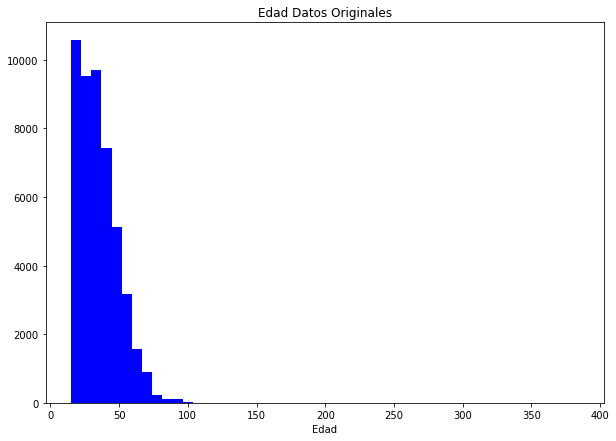

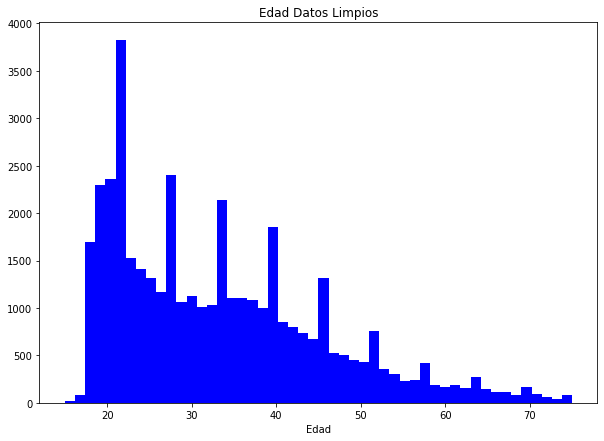

In [156]:
# V_age
# datos originales
Histograma(df['v_AGE'], 50, False, 'Edad', 'Edad Datos Originales', 'graficas/hist_edad_o.png')
# datos Limpios
Histograma(tratamiento_1['v_AGE'], 50, False, 'Edad', 'Edad Datos Limpios', 'graficas/hist_edad_l.png')

_Observamos una reducción en el rango de variables y una concentración de edades entre los 18 a 25 años, esto puede ser ya que las personas de dichas edades se empiezan a independisar de sus familia y necesitan un apoyo económico para lograr sus objetivos._

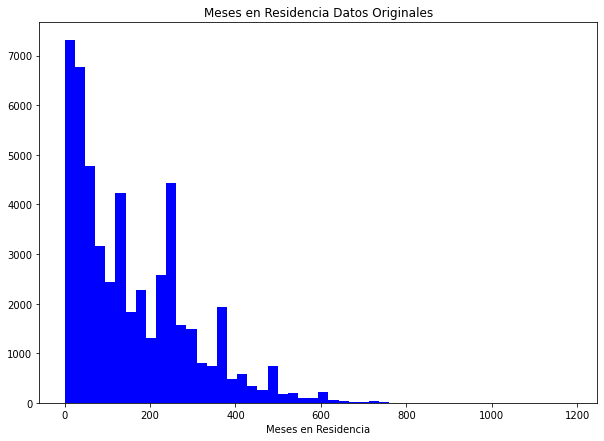

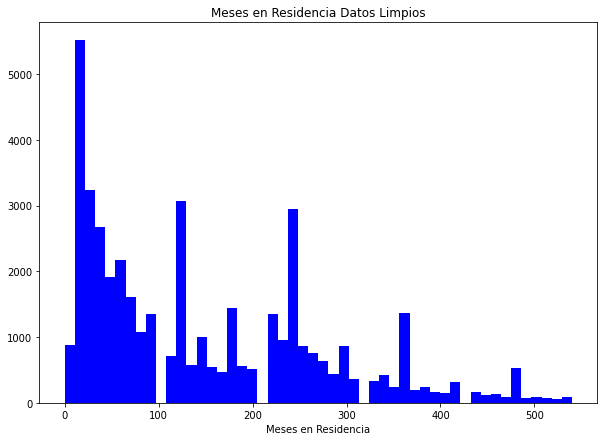

In [157]:
# v_MONTHS_IN_RESIDENCE
# datos originales
Histograma(df['v_MONTHS_IN_RESIDENCE'], 50, False, 'Meses en Residencia',
           'Meses en Residencia Datos Originales', 'graficas/hist_meses_o.png')
# datos Limpios
Histograma(tratamiento_1['v_MONTHS_IN_RESIDENCE'], 50, False, 'Meses en Residencia',
           'Meses en Residencia Datos Limpios', 'graficas/hist_meses_l.png')

_Vemos una reducción en el rango de Meses en residencia, y notamos una divisón en bloque en cada rango. Se puede observar que la concentración se encuentra en el primer bloque, es decir hay más solicitudes de crédito en personas que llevan menos de 100 meses o menos de una década en su residencia._

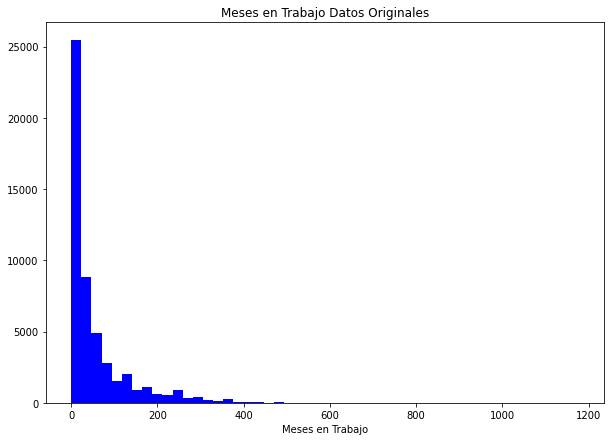

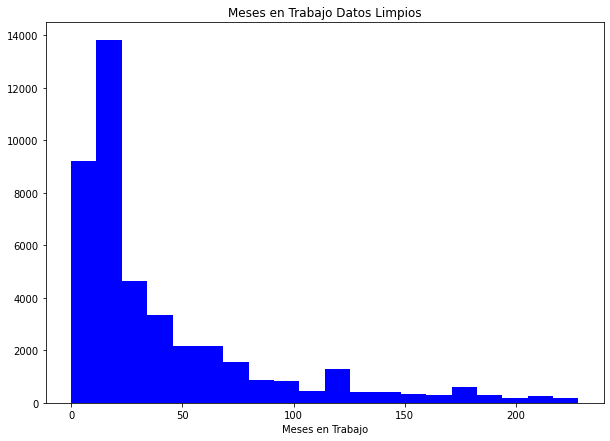

In [158]:
# v_MONTHS_IN_THE_JOB
# datos originales
Histograma(df['v_MONTHS_IN_THE_JOB'], 50, False, 'Meses en Trabajo',
           'Meses en Trabajo Datos Originales', 'graficas/hist_trabajo_o.png')
# datos Limpios
Histograma(tratamiento_1['v_MONTHS_IN_THE_JOB'], 20, False, 'Meses en Trabajo',
           'Meses en Trabajo Datos Limpios', 'graficas/hist_trabajo_l.png')

_Observamos una disminucíon de rango en los meses de trabajo, de igual manera vemos una concentración de solicitud de créditos en un rango entre 0 y 24 meses, es decir que las personas que van empezando un trabajo son los mayores solicitantes de créditos._

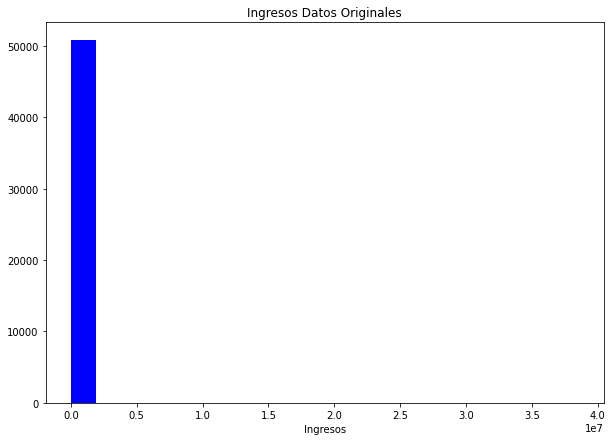

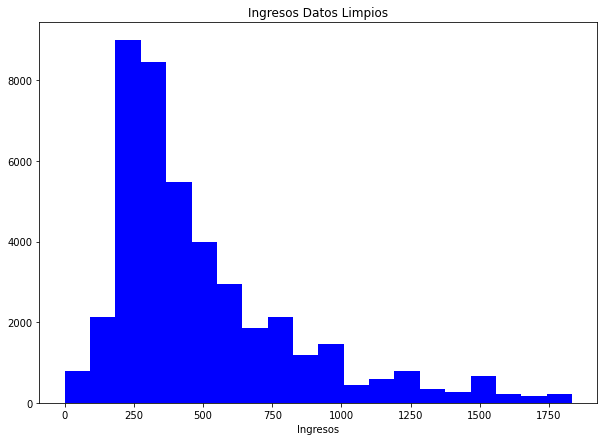

In [160]:
# c_PERSONAL_NET_INCOME
# datos originales
Histograma(df['c_PERSONAL_NET_INCOME'], 20, False, 'Ingresos',
           'Ingresos Datos Originales', 'graficas/hist_ingr_o.png')
# datos Limpios
Histograma(tratamiento_1['c_PERSONAL_NET_INCOME'], 20, False, 'Ingresos',
           'Ingresos Datos Limpios', 'graficas/hist_ingre_l.png')

_En los datos originales existe un rango muy grande de ingresos, este se disminuye en los datos ya tratados, notamos que las personas que ganan entre 200 a 400 son lo qeu solicitan más crédito, esto es porque son los individuos que ganan menos en nuestro conjunto de datos._

## 5. Datos faltantes

### Genere su conjunto de entrenamiento y prueba , donde el conjunto de prueba tenga el 30% de la información

In [161]:
# conjunto de entrenamiento y prueba con sklearn
X_train1, X_test1, y_train1, y_test1 = train_test_split(tratamiento_1.loc[:, tratamiento_1.columns != 'v_tgt'], 
                                                    tratamiento_1.loc[:, 'v_tgt'],
                                                        test_size = 0.30)

In [163]:
nulos_1 = X_train1.isnull().sum()
pd.DataFrame(nulos_1[nulos_1 > 0])

0
v_AGE                  1518
c_MATE_INCOME           198
c_PERSONAL_NET_INCOME   125

### Realice la imputación de valores ausentes , sobre las variables que lo requieran (para las continuas seleccione uno de los métodos posibles)

In [164]:
# variables imputación por mediana
mediana_c = ['c_MATE_INCOME', 'c_PERSONAL_NET_INCOME', 'v_AGE']

# iteración en variables continuas
for i in mediana_c:
    # imputar con el valor de la moda en cada columna
    mediana = X_train1[i].median()
    X_train1[i] = X_train1[i].fillna(mediana)
    # valores X_test1
    X_test1[i] = X_test1[i].fillna(mediana)
    print(i + ' : ' + str(mediana))

c_MATE_INCOME : 0.0
c_PERSONAL_NET_INCOME : 398.0
v_AGE : 31.0


_Se utilizará la mediana ya que no conocemos el comportamiento real de las variables continuas, si estas estuvieran divididas en forma normal se utilizaría la media._

In [165]:
X_train1.isnull().sum()

v_ID_CLIENT                                            0
v_ID_SHOP                                              0
v_AGE                                                  0
v_QUANT_DEPENDANTS                                     0
v_AREA_CODE_RESIDENCIAL_PHONE                          0
v_PAYMENT_DAY                                          0
v_SHOP_RANK                                            0
v_MONTHS_IN_RESIDENCE                                  0
v_MONTHS_IN_THE_JOB                                    0
v_PROFESSION_CODE                                      0
c_MATE_INCOME                                          0
v_QUANT_BANKING_ACCOUNTS                               0
c_PERSONAL_NET_INCOME                                  0
v_COD_APPLICATION_BOOTH                                0
v_QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION            0
v_SEX_M                                                0
v_MARITAL_STATUS_D                                     0
v_MARITAL_STATUS_O             

## 6. Ingeniería de datos

### Genere variables a partir de las variables continuas , al menos se deben crear dos

In [166]:
# sueldo trabajado, cuanto ha recibido por el trabajo hecho
X_train1['c_WORKED_INCOME'] = X_train1['c_PERSONAL_NET_INCOME'] * X_train1['v_MONTHS_IN_THE_JOB']
# x_test
X_test1['c_WORKED_INCOME'] = X_test1['c_PERSONAL_NET_INCOME'] * X_test1['v_MONTHS_IN_THE_JOB']

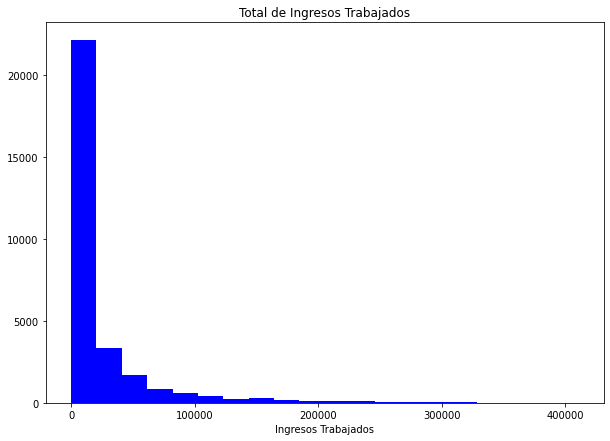

In [167]:
Histograma(X_train1['c_WORKED_INCOME'], 20, False, 'Ingresos Trabajados', 'Total de Ingresos Trabajados',
          'graficas/hist_ing_trabajados.png')

In [168]:
# Edad de inicio en el trabajo
X_train1['v_START_WORKING'] = X_train1['v_AGE'] - X_train1['v_MONTHS_IN_THE_JOB'] / 12
# x_test
X_test1['v_START_WORKING'] = X_test1['v_AGE'] - X_test1['v_MONTHS_IN_THE_JOB'] / 12

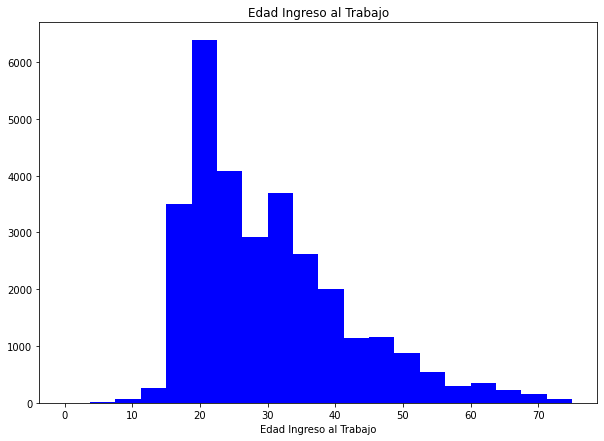

In [169]:
Histograma(X_train1['v_START_WORKING'], 20, False, 'Edad Ingreso al Trabajo', 'Edad Ingreso al Trabajo',
          'graficas/hist_inicio_trabajo.png')

_Se crearon esras dos nuevas variables para corroborar que las personas digan información realista, la primera variable es c_WORKED_INCOME e indica cual es el salário obtenido por los meses trabajados, podemos observar en el histograma que la mayoría de las personas tienen ingresos 0, por lo que no seria correcto asignar un crédito a una persona que no ha trabajado ni un mes dentro de una empresa. La segunda variable creada es edad de inicio en el trabajo, observamos en el histrograma que la gran mayoría inicio un trabajo a partir de los 20 años, pero existen otros datos como las personas que empezaron a trabajar a edad 5 o más de 70 años de edad._

## 7. Reducción de dimensiones

### Elimine variables con varianza baja

In [62]:
# Variables con varianza menor que .01
tratamiento_1.var()[tratamiento_1.var() < .01]

v_QUANT_DEPENDANTS                        0.000000
c_MATE_INCOME                             0.000000
v_QUANT_BANKING_ACCOUNTS                  0.000000
v_COD_APPLICATION_BOOTH                   0.000000
v_FLAG_MOTHERS_NAME_Y                     0.003912
v_FLAG_RESIDENCE_STATE=WORKING_STATE_Y    0.008429
dtype: float64

_Observamos que las variables v_QUANT_DEPENDANTS, c_MATE_INCOME, v_QUANT_BANKING_ACCOUNTS, v_COD_APPLICATION_BOOTH, v_FLAG_MOTHERS_NAME_Y, v_FLAG_RESIDENCE_STATE=WORKING_STATE_Y tienen una varianza cercana a 0 por lo que se eliminarán._

In [170]:
# Variables con baja varianza
variables_bajaVar = ['v_QUANT_DEPENDANTS', 'c_MATE_INCOME', 'v_QUANT_BANKING_ACCOUNTS', 'v_COD_APPLICATION_BOOTH',
                    'v_FLAG_MOTHERS_NAME_Y', 'v_FLAG_RESIDENCE_STATE=WORKING_STATE_Y']

#eliminar variables
X_train1.drop(variables_bajaVar, axis = 1, inplace = True)
X_test1.drop(variables_bajaVar, axis = 1, inplace = True)

### Tome solo las variables continuas y utilice PCA para generar una visualización en 3D de las variables continuas con la distinción de los valores de la target.

In [171]:
# variables continuas
var_con = ['v_AGE', 'v_PAYMENT_DAY', 'v_MONTHS_IN_RESIDENCE', 'v_MONTHS_IN_THE_JOB', 'c_PERSONAL_NET_INCOME',
          'c_WORKED_INCOME', 'v_START_WORKING']

_Se toman estas variables como continuas por el amplio rango que contienen, si estas no se tomarán se tendrían pocas variables para hacer un análisis con PCA._

In [172]:
# estandarizar y escalar valores para el algoritmo de PCA
scaler = StandardScaler()
scaler.fit(X_train1[var_con])
X_sc=scaler.transform(X_train1[var_con])

In [173]:
# PCA con tres variables
pca = PCA(n_components = 3)
# entrenamiento
pca.fit(X_sc)

#Porcentaje de varianza explicada por cada uno de los componentes seleccionados.
print('Varianza Acumulada 3 Variables')
print(pca.explained_variance_ratio_.sum())

Varianza Acumulada 3 Variables
0.7463668165029913


In [174]:
# gráfica
# tabla de datos reducida a 3 dimensiones con PCA
X_pca=pd.DataFrame(pca.transform(X_sc))

#gŕafica
total_var = pca.explained_variance_ratio_.sum() * 100

plt.figure(figsize = (8, 10))
fig = px.scatter_3d(
    X_pca, x=0, y=1, z=2, color=y_train1,
    title=f'Total de Varianza Explicada: {total_var:.2f}%',
    labels={'0': 'CP 1', '1': 'CP 2', '2': 'CP 3'}
)
fig.show()

<Figure size 576x720 with 0 Axes>

### Tablas Entrenamiento y Tets Limpias

In [175]:
X_train1.head()

v_ID_CLIENT  v_ID_SHOP  v_AGE  v_AREA_CODE_RESIDENCIAL_PHONE  \
44882        24236          1   62.0                             31   
33499        41856         25   19.0                             50   
44262        21122         15   31.0                             31   
42522        12786         15   29.0                             50   
8553         10652         22   26.0                             31   

       v_PAYMENT_DAY  v_SHOP_RANK  v_MONTHS_IN_RESIDENCE  v_MONTHS_IN_THE_JOB  \
44882             16            0                     96                   12   
33499              8            0                    228                    0   
44262             12            0                     12                   12   
42522             18            0                     36                    0   
8553              18            0                     36                  120   

       v_PROFESSION_CODE  c_PERSONAL_NET_INCOME  ...  v_RESIDENCE_TYPE_O  \
44882                 26                  220.0  ...                   1   
33499                401                  320.0  ...                   0   
44262                501                  300.0  ...                   0   
42522                999                    0.0  ...                   0   
8553                 131                  450.0  ...                   0   

       v_RESIDENCE_TYPE_P  v_FLAG_FATHERS_NAME_Y  \
44882                   0                      1   
33499                   0                      1   
44262                   1                      1   
42522                   0                      1   
8553                    0                      1   

       v_FLAG_RESIDENCE_TOWN=WORKING_TOWN_Y  \
44882                                     0   
33499                                     1   
44262                                     0   
42522                                     0   
8553                                      0   

       v_FLAG_RESIDENCIAL_ADDRESS=POSTAL_ADDRESS_Y  \
44882                                            1   
33499                                            1   
44262                                            1   
42522                                            1   
8553                                             1   

       v_PROFESSION_Healthcare Practitioners and Technical  \
44882                                                  1     
33499                                                  0     
44262                                                  0     
42522                                                  1     
8553                                                   0     

       v_PROFESSION_Life, Physical, and Social Science  \
44882                                                0   
33499                                                0   
44262                                                0   
42522                                                0   
8553                                                 0   

       v_PROFESSION_Production  c_WORKED_INCOME  v_START_WORKING  
44882                        0           2640.0             61.0  
33499                        0              0.0             19.0  
44262                        0           3600.0             30.0  
42522                        0              0.0             29.0  
8553                         0          54000.0             16.0  

[5 rows x 28 columns]

In [176]:
X_test1.head()

v_ID_CLIENT  v_ID_SHOP  v_AGE  v_AREA_CODE_RESIDENCIAL_PHONE  \
8443         10514         13   21.0                             31   
21222        26525         25   21.0                             31   
16030        20085          1   18.0                             31   
26585        33164         66   21.0                             50   
12564        15694         55   38.0                             50   

       v_PAYMENT_DAY  v_SHOP_RANK  v_MONTHS_IN_RESIDENCE  v_MONTHS_IN_THE_JOB  \
8443              28            0                     36                    0   
21222             18            0                     60                    0   
16030              1            0                    156                    0   
26585             18            0                    252                   12   
12564             12            0                     72                   12   

       v_PROFESSION_CODE  c_PERSONAL_NET_INCOME  ...  v_RESIDENCE_TYPE_O  \
8443                 999                  300.0  ...                   0   
21222                950                    0.0  ...                   0   
16030                999                  500.0  ...                   0   
26585                 26                  164.7  ...                   0   
12564                139                  200.0  ...                   0   

       v_RESIDENCE_TYPE_P  v_FLAG_FATHERS_NAME_Y  \
8443                    1                      1   
21222                   1                      1   
16030                   1                      1   
26585                   1                      1   
12564                   1                      1   

       v_FLAG_RESIDENCE_TOWN=WORKING_TOWN_Y  \
8443                                      0   
21222                                     0   
16030                                     0   
26585                                     1   
12564                                     1   

       v_FLAG_RESIDENCIAL_ADDRESS=POSTAL_ADDRESS_Y  \
8443                                             1   
21222                                            1   
16030                                            1   
26585                                            1   
12564                                            1   

       v_PROFESSION_Healthcare Practitioners and Technical  \
8443                                                   1     
21222                                                  1     
16030                                                  1     
26585                                                  1     
12564                                                  1     

       v_PROFESSION_Life, Physical, and Social Science  \
8443                                                 0   
21222                                                0   
16030                                                0   
26585                                                0   
12564                                                0   

       v_PROFESSION_Production  c_WORKED_INCOME  v_START_WORKING  
8443                         0              0.0             21.0  
21222                        0              0.0             21.0  
16030                        0              0.0             18.0  
26585                        0           1976.4             20.0  
12564                        0           2400.0             37.0  

[5 rows x 28 columns]

## Tratamiento 2

In [185]:
#copia de tabla df
tratamiento_2 = df_limpio.copy(deep = True)

## 8. Transformación entrópica

### Genere una función que realice lo siguiente:

In [186]:
def trans_entropica(train, test, continuas_ent, discretas_ent, target):
    #copia de data frame
    df_E = train.copy(deep = True)
    df_test = test.copy(deep = True)
    # iteración por variable continua
    for j in continuas_ent:
        # bandera para while
        bandera = True
        # máximo 10 bins
        bins = 10
        while bandera:
            # separación de variables
            aux = pd.cut(df_E[j],bins=bins).astype(str).value_counts(1)
            _, bins_aux = pd.cut(df_E[j],bins=bins, retbins = True)
            # auxiliar indicadora
            aux_indicadora = 0
            # bins reales
            bins_2 = len(aux)
            # iteración por valores
            for i in range(bins_2):
                # eliminar condicional de nans
                if aux.index[i] != 'nan':
                    #condicional mayor a .5
                    if aux[i] >= 0.05:
                        aux_indicadora += 1
                else:
                    aux_indicadora += 1
                    # condicional de cada grupo
            if aux_indicadora != bins_2:
                # si no cumple, reducir bin
                bins = bins - 1
            else:
                # agregar valores
                df_E[j]=pd.cut(df_E[j],bins=bins).astype(str)
                #agregar valores x_test
                df_test[j] = pd.cut(df_test[j], bins_aux).astype(str)
                # cambiar missings
                df_E[j]=df_E[j].replace({"nan":"Missing"})
                df_test[j] = df_test[j].replace({"nan":"Missing"})
                bandera = False
            
    # remplazar missings en variables discretas
    for discreta in discretas_ent:
        df_E[discreta] = df_E[discreta].fillna('Missing')
        df_test[discreta] = df_test[discreta].fillna('Missing')
        
    # WOE
    #diccionario WOE
    WOE = {}

    #diccionario IV
    IV = {}

    # iteración por variable
    for columna in df_E.columns[df_E.columns != target]:
        #conteo de eventos y no eventos por variable
        aux = df_E[[columna, target]].groupby(columna).agg(["count","sum"])

        # numero de no eventos y eventos
        aux["no_evento"]=aux[target,"count"]-aux["v_tgt","sum"]
        aux["evento"]=aux[target,"sum"]

        # porcentaje de eventos y no eventos
        aux["evento%"]=aux["evento"]/aux["evento"].sum()
        aux["no_evento%"]=aux["no_evento"]/aux["no_evento"].sum()

        #calculo de WOE
        aux["WOE"]=np.log(aux["evento%"]/aux["no_evento%"])
        #CALCULO DE IV
        aux["IV"]=(aux["evento%"]-aux["no_evento%"])*aux["WOE"]

        #diccionario WOE
        WOE[columna] = dict(zip(aux.index, aux['WOE']))

        #diccionario WOE
        IV[columna] = aux['IV'].sum()

        # tabla
        nombre_columna = 'W_'+columna
        aux2=aux[["WOE"]].reset_index().rename(columns={"WOE":nombre_columna})

        #union
        df_E = df_E.merge(aux2,on=columna,how="left")
        df_test = df_test.merge(aux2,on=columna,how="left")
        
    return df_E, df_test, WOE, IV

In [189]:
# variables con varianza igual a 0
var_zero = tratamiento_2.var()[tratamiento_2.var() == 0].index
#eliminar variables
tratamiento_2.drop(var_zero, axis=1, inplace = True)

In [190]:
# separación
X_train, X_test = train_test_split(tratamiento_2.iloc[:, 2:], test_size = 0.30)

_Se elimnaron las dos primeras columnas ya que eran ID'S_

In [191]:
# tipos de variables
# continuas
continuas_ent = ['v_AGE', 'v_PAYMENT_DAY', 'v_MONTHS_IN_RESIDENCE', 'v_MONTHS_IN_THE_JOB', 'c_MATE_INCOME',
                 'c_PERSONAL_NET_INCOME']

# discretas
discretas_ent = list(X_train.columns)
# eliminar varibles continuas
for i in continuas_ent:
    discretas_ent.remove(i)

#eliminar target
discretas_ent.remove('v_tgt')

In [192]:
X_train_e, X_test_e, dict_WOE, dict_IV = trans_entropica(X_train, X_test, continuas_ent, discretas_ent, 'v_tgt')

/home/edco17/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:618: UserWarning:

merging between different levels can give an unintended result (1 levels on the left, 2 on the right)

/home/edco17/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

/home/edco17/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning:

divide by zero encountered in log



In [193]:
X_train_e.head()

v_AGE  v_AREA_CODE_RESIDENCIAL_PHONE v_PAYMENT_DAY  v_SHOP_RANK  \
0  (14.631, 384.0]                             50  (10.0, 14.5]            0   
1  (14.631, 384.0]                             31  (23.5, 28.0]            0   
2  (14.631, 384.0]                             31   (5.5, 10.0]            0   
3  (14.631, 384.0]                             31  (23.5, 28.0]            0   
4  (14.631, 384.0]                             31  (14.5, 19.0]            0   

  v_MONTHS_IN_RESIDENCE v_MONTHS_IN_THE_JOB  v_PROFESSION_CODE  \
0      (-1.176, 1176.0]    (-1.176, 1176.0]                950   
1      (-1.176, 1176.0]    (-1.176, 1176.0]                100   
2      (-1.176, 1176.0]    (-1.176, 1176.0]                 30   
3      (-1.176, 1176.0]    (-1.176, 1176.0]                110   
4      (-1.176, 1176.0]    (-1.176, 1176.0]                131   

        c_MATE_INCOME     c_PERSONAL_NET_INCOME  \
0  (-150.0, 150000.0]  (-38529.098, 38529098.0]   
1  (-150.0, 150000.0]  (-38529.098, 38529098.0]   
2  (-150.0, 150000.0]  (-38529.098, 38529098.0]   
3  (-150.0, 150000.0]  (-38529.098, 38529098.0]   
4  (-150.0, 150000.0]  (-38529.098, 38529098.0]   

   v_QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION  ...  (W_v_RESIDENCE_TYPE_O, )  \
0                                            0  ...                  0.001121   
1                                            0  ...                  0.001121   
2                                            0  ...                  0.001121   
3                                            0  ...                  0.001121   
4                                            0  ...                  0.001121   

   (W_v_RESIDENCE_TYPE_P, )  (W_v_FLAG_MOTHERS_NAME_Y, )  \
0                 -0.027518                    -0.000219   
1                 -0.027518                    -0.000219   
2                 -0.027518                    -0.000219   
3                 -0.027518                    -0.000219   
4                 -0.027518                    -0.000219   

   (W_v_FLAG_FATHERS_NAME_Y, )  (W_v_FLAG_RESIDENCE_TOWN=WORKING_TOWN_Y, )  \
0                    -0.010156                                    0.033605   
1                    -0.010156                                    0.033605   
2                    -0.010156                                   -0.041063   
3                     0.228244                                   -0.041063   
4                    -0.010156                                   -0.041063   

   (W_v_FLAG_RESIDENCE_STATE=WORKING_STATE_Y, )  \
0                                     -0.000328   
1                                     -0.000328   
2                                     -0.000328   
3                                     -0.000328   
4                                     -0.000328   

   (W_v_FLAG_RESIDENCIAL_ADDRESS=POSTAL_ADDRESS_Y, )  \
0                                          -0.001306   
1                                          -0.001306   
2                                          -0.001306   
3                                          -0.001306   
4                                          -0.001306   

   (W_v_PROFESSION_Healthcare Practitioners and Technical, )  \
0                                           0.095398           
1                                          -0.066481           
2                                           0.095398           
3                                          -0.066481           
4                                          -0.066481           

   (W_v_PROFESSION_Life, Physical, and Social Science, )  \
0                                           0.002548       
1                                          -0.013871       
2                                           0.002548       
3                                           0.002548       
4                                           0.002548       

   (W_v_PROFESSION_Production, )  
0                      -0.006199  
1                      -0.006199  
2               

In [194]:
X_test_e.head()

v_AGE  v_AREA_CODE_RESIDENCIAL_PHONE v_PAYMENT_DAY  v_SHOP_RANK  \
0  (14.631, 384.0]                             50  (10.0, 14.5]            0   
1  (14.631, 384.0]                             50   (5.5, 10.0]            0   
2          Missing                             31   (5.5, 10.0]            0   
3  (14.631, 384.0]                             31  (14.5, 19.0]            0   
4  (14.631, 384.0]                              5  (19.0, 23.5]            0   

  v_MONTHS_IN_RESIDENCE v_MONTHS_IN_THE_JOB  v_PROFESSION_CODE  \
0      (-1.176, 1176.0]    (-1.176, 1176.0]                205   
1      (-1.176, 1176.0]    (-1.176, 1176.0]                205   
2      (-1.176, 1176.0]    (-1.176, 1176.0]                522   
3      (-1.176, 1176.0]    (-1.176, 1176.0]                703   
4      (-1.176, 1176.0]    (-1.176, 1176.0]                 60   

        c_MATE_INCOME     c_PERSONAL_NET_INCOME  \
0  (-150.0, 150000.0]  (-38529.098, 38529098.0]   
1  (-150.0, 150000.0]  (-38529.098, 38529098.0]   
2  (-150.0, 150000.0]  (-38529.098, 38529098.0]   
3  (-150.0, 150000.0]  (-38529.098, 38529098.0]   
4  (-150.0, 150000.0]  (-38529.098, 38529098.0]   

   v_QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION  ...  (W_v_RESIDENCE_TYPE_O, )  \
0                                            0  ...                  0.001121   
1                                            0  ...                  0.001121   
2                                            0  ...                  0.001121   
3                                            0  ...                  0.001121   
4                                            0  ...                  0.001121   

   (W_v_RESIDENCE_TYPE_P, )  (W_v_FLAG_MOTHERS_NAME_Y, )  \
0                 -0.027518                    -0.000219   
1                  0.047103                    -0.000219   
2                 -0.027518                    -0.000219   
3                 -0.027518                    -0.000219   
4                  0.047103                    -0.000219   

   (W_v_FLAG_FATHERS_NAME_Y, )  (W_v_FLAG_RESIDENCE_TOWN=WORKING_TOWN_Y, )  \
0                    -0.010156                                   -0.041063   
1                    -0.010156                                    0.033605   
2                    -0.010156                                    0.033605   
3                    -0.010156                                    0.033605   
4                    -0.010156                                   -0.041063   

   (W_v_FLAG_RESIDENCE_STATE=WORKING_STATE_Y, )  \
0                                     -0.000328   
1                                     -0.000328   
2                                     -0.000328   
3                                     -0.000328   
4                                     -0.000328   

   (W_v_FLAG_RESIDENCIAL_ADDRESS=POSTAL_ADDRESS_Y, )  \
0                                          -0.001306   
1                                          -0.001306   
2                                          -0.001306   
3                                          -0.001306   
4                                          -0.001306   

   (W_v_PROFESSION_Healthcare Practitioners and Technical, )  \
0                                          -0.066481           
1                                          -0.066481           
2                                          -0.066481           
3                                          -0.066481           
4                                          -0.066481           

   (W_v_PROFESSION_Life, Physical, and Social Science, )  \
0                                           0.002548       
1                                           0.002548       
2                                           0.002548       
3                                           0.002548       
4                                           0.002548       

   (W_v_PROFESSION_Production, )  
0                       0.027219  
1                       0.027219  
2               

In [195]:
variables_finales = list(X_test_e.iloc[:, -27:].columns)
# agregar target
variables_finales.append('v_tgt')
# train
X_train_f = X_train_e[variables_finales]
#test
X_test_f = X_test_e[variables_finales]

/home/edco17/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [196]:
X_train_f.head()

(W_v_AGE, )  (W_v_AREA_CODE_RESIDENCIAL_PHONE, )  (W_v_PAYMENT_DAY, )  \
0     0.000153                             0.204127            -0.122621   
1     0.000153                            -0.043840             0.190432   
2     0.000153                            -0.043840            -0.001004   
3     0.000153                            -0.043840             0.190432   
4     0.000153                            -0.043840            -0.055079   

   (W_v_SHOP_RANK, )  (W_v_MONTHS_IN_RESIDENCE, )  (W_v_MONTHS_IN_THE_JOB, )  \
0          -0.000769                          0.0                        0.0   
1          -0.000769                          0.0                        0.0   
2          -0.000769                          0.0                        0.0   
3          -0.000769                          0.0                        0.0   
4          -0.000769                          0.0                        0.0   

   (W_v_PROFESSION_CODE, )  (W_c_MATE_INCOME, )  (W_c_PERSONAL_NET_INCOME, )  \
0                 0.224632             0.000354                     0.000451   
1                -0.112938             0.000354                     0.000451   
2                 0.234954             0.000354                     0.000451   
3                 0.196539             0.000354                     0.000451   
4                -0.100649             0.000354                     0.000451   

   (W_v_QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION, )  ...  \
0                                           0.024936  ...   
1                                           0.024936  ...   
2                                           0.024936  ...   
3                                           0.024936  ...   
4                                           0.024936  ...   

   (W_v_RESIDENCE_TYPE_P, )  (W_v_FLAG_MOTHERS_NAME_Y, )  \
0                 -0.027518                    -0.000219   
1                 -0.027518                    -0.000219   
2                 -0.027518                    -0.000219   
3                 -0.027518                    -0.000219   
4                 -0.027518                    -0.000219   

   (W_v_FLAG_FATHERS_NAME_Y, )  (W_v_FLAG_RESIDENCE_TOWN=WORKING_TOWN_Y, )  \
0                    -0.010156                                    0.033605   
1                    -0.010156                                    0.033605   
2                    -0.010156                                   -0.041063   
3                     0.228244                                   -0.041063   
4                    -0.010156                                   -0.041063   

   (W_v_FLAG_RESIDENCE_STATE=WORKING_STATE_Y, )  \
0                                     -0.000328   
1                                     -0.000328   
2                                     -0.000328   
3                                     -0.000328   
4                                     -0.000328   

   (W_v_FLAG_RESIDENCIAL_ADDRESS=POSTAL_ADDRESS_Y, )  \
0                                          -0.001306   
1                                          -0.001306   
2                                          -0.001306   
3                                          -0.001306   
4                                          -0.001306   

   (W_v_PROFESSION_Healthcare Practitioners and Technical, )  \
0                                           0.095398           
1                                          -0.066481           
2                                           0.095398           
3                                          -0.066481           
4                                          -0.066481           

   (W_v_PROFESSION_Life, Physical, and Social Science, )  \
0                                           0.002548       
1                                          -0.013871       
2                                           0.002548       
3                                           0.002548       
4                                           0.002548      

In [197]:
X_test_f.head()

(W_v_AGE, )  (W_v_AREA_CODE_RESIDENCIAL_PHONE, )  (W_v_PAYMENT_DAY, )  \
0     0.000153                             0.204127            -0.122621   
1     0.000153                             0.204127            -0.001004   
2    -0.002995                            -0.043840            -0.001004   
3     0.000153                            -0.043840            -0.055079   
4     0.000153                            -0.223525             0.038825   

   (W_v_SHOP_RANK, )  (W_v_MONTHS_IN_RESIDENCE, )  (W_v_MONTHS_IN_THE_JOB, )  \
0          -0.000769                          0.0                        0.0   
1          -0.000769                          0.0                        0.0   
2          -0.000769                          0.0                        0.0   
3          -0.000769                          0.0                        0.0   
4          -0.000769                          0.0                        0.0   

   (W_v_PROFESSION_CODE, )  (W_c_MATE_INCOME, )  (W_c_PERSONAL_NET_INCOME, )  \
0                 0.115306             0.000354                     0.000451   
1                 0.115306             0.000354                     0.000451   
2                -0.234590             0.000354                     0.000451   
3                -0.207591             0.000354                     0.000451   
4                 0.059269             0.000354                     0.000451   

   (W_v_QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION, )  ...  \
0                                           0.024936  ...   
1                                           0.024936  ...   
2                                           0.024936  ...   
3                                           0.024936  ...   
4                                           0.024936  ...   

   (W_v_RESIDENCE_TYPE_P, )  (W_v_FLAG_MOTHERS_NAME_Y, )  \
0                 -0.027518                    -0.000219   
1                  0.047103                    -0.000219   
2                 -0.027518                    -0.000219   
3                 -0.027518                    -0.000219   
4                  0.047103                    -0.000219   

   (W_v_FLAG_FATHERS_NAME_Y, )  (W_v_FLAG_RESIDENCE_TOWN=WORKING_TOWN_Y, )  \
0                    -0.010156                                   -0.041063   
1                    -0.010156                                    0.033605   
2                    -0.010156                                    0.033605   
3                    -0.010156                                    0.033605   
4                    -0.010156                                   -0.041063   

   (W_v_FLAG_RESIDENCE_STATE=WORKING_STATE_Y, )  \
0                                     -0.000328   
1                                     -0.000328   
2                                     -0.000328   
3                                     -0.000328   
4                                     -0.000328   

   (W_v_FLAG_RESIDENCIAL_ADDRESS=POSTAL_ADDRESS_Y, )  \
0                                          -0.001306   
1                                          -0.001306   
2                                          -0.001306   
3                                          -0.001306   
4                                          -0.001306   

   (W_v_PROFESSION_Healthcare Practitioners and Technical, )  \
0                                          -0.066481           
1                                          -0.066481           
2                                          -0.066481           
3                                          -0.066481           
4                                          -0.066481           

   (W_v_PROFESSION_Life, Physical, and Social Science, )  \
0                                           0.002548       
1                                           0.002548       
2                                           0.002548       
3                                           0.002548       
4                                           0.002548      

In [200]:
pd.DataFrame(pd.Series(dict_IV))

0
v_AGE                                               4.575220e-07
v_AREA_CODE_RESIDENCIAL_PHONE                                inf
v_PAYMENT_DAY                                       1.064961e-02
v_SHOP_RANK                                         3.303141e-04
v_MONTHS_IN_RESIDENCE                               0.000000e+00
v_MONTHS_IN_THE_JOB                                 0.000000e+00
v_PROFESSION_CODE                                            inf
c_MATE_INCOME                                       2.110806e-05
c_PERSONAL_NET_INCOME                               5.267641e-05
v_QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION                  inf
v_SEX_M                                             1.054177e-02
v_MARITAL_STATUS_D                                  2.019769e-03
v_MARITAL_STATUS_O                                  1.778334e-03
v_MARITAL_STATUS_S                                  2.992344e-02
v_MARITAL_STATUS_V                                  5.136864e-03
v_FLAG_RESIDENCIAL_PHONE_Y                          3.491809e-02
v_RESIDENCE_TYPE_C                                  4.632509e-04
v_RESIDENCE_TYPE_O                                  3.456349e-05
v_RESIDENCE_TYPE_P                                  1.296049e-03
v_FLAG_MOTHERS_NAME_Y                               1.282159e-05
v_FLAG_FATHERS_NAME_Y                               2.317606e-03
v_FLAG_RESIDENCE_TOWN=WORKING_TOWN_Y                1.379746e-03
v_FLAG_RESIDENCE_STATE=WORKING_STATE_Y              1.223861e-05
v_FLAG_RESIDENCIAL_ADDRESS=POSTAL_ADDRESS_Y         7.758093e-05
v_PROFESSION_Healthcare Practitioners and Techn...  6.338747e-03
v_PROFESSION_Life, Physical, and Social Science     3.533714e-05
v_PROFESSION_Production                             1.687287e-04